In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Read the excel file and store the sheets into dataframes.
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')
df = pd.ExcelFile(r"/Users/niles/V02Max_Combined.xlsx")
kay = pd.read_excel(df, sheet_name = 'Kayaking')
ath = pd.read_excel(df, sheet_name = 'Athletes')
tri = pd.read_excel(df, sheet_name = 'Triathlon')
fen = pd.read_excel(df, sheet_name = 'Fencing')

<span style="font-size:24px;">##Question 1: Join all sport-related tables to produce one dataframe that has all athletes values. The final table should only have the same 5 columns: ID, time,power,RR, vo2, power. Write this dataframe to an excel file.</span>


In [600]:
#Concatenating all sport related table to one dataframe final_table
final_table=pd.concat([fen[['ID','time','RR','VO2','power']],
                       kay[['ID','time','RR','VO2','power']],
                       tri[['ID','time','RR','VO2','power']]],ignore_index=True)

#defining output excel file name
output='FinalVO2_Table.xlsx'

#writing dataframe to excel using to_excel
final_table.to_excel(output,index=False)
print("Dataframe successfully written to Excel file",output)

#Reading the excel file back into dataframe for verification
print("\nReading",output,"Excel file for Verification:")
sportdf=pd.read_excel("FinalVO2_Table.xlsx")
print(sportdf)

Dataframe successfully written to Excel file FinalVO2_Table.xlsx

Reading FinalVO2_Table.xlsx Excel file for Verification:
       ID     time     RR       VO2  power
0       1 -130.840  672.0  0.302008      0
1       1 -130.168  672.0  0.302008      0
2       1 -129.536  632.0  0.301336      0
3       1 -128.824  712.0  0.301336      0
4       1 -127.948  876.0  0.301336      0
...    ..      ...    ...       ...    ...
52057  18  947.288  536.0  0.507071      0
52058  18  947.816  528.0  0.507071      0
52059  18  948.344  528.0  0.507071      0
52060  18  948.884  540.0  0.507071      0
52061  18  949.424  540.0  0.507071      0

[52062 rows x 5 columns]


<span style="font-size:24px;">##Question 2: Divide the rows into 3 parts: Warm up, GET(graded exercise test) and cool down using the data def. Label each row accordingly</span>


In [30]:


#Initialize Dataframe phase
phase=pd.DataFrame(final_table)

#initialize Phase column
phase['Phase']='Other Phase'

#Apply conditions to find Warm Up-time less than 0,GET-time>=0 and power>0,Cool Down-time>0 and power=0
phase.loc[phase['time']<0,'Phase']='Warm Up'
phase.loc[(phase['time']>=0) & (phase['power']>0),'Phase']='GET'
phase.loc[(phase['time']>0) & (phase['power']==0),'Phase']='Cool Down'

#print dataframe phase details
print(phase)

       ID     time     RR       VO2  power      Phase
0       1 -130.840  672.0  0.302008      0    Warm Up
1       1 -130.168  672.0  0.302008      0    Warm Up
2       1 -129.536  632.0  0.301336      0    Warm Up
3       1 -128.824  712.0  0.301336      0    Warm Up
4       1 -127.948  876.0  0.301336      0    Warm Up
...    ..      ...    ...       ...    ...        ...
52057  18  947.288  536.0  0.507071      0  Cool Down
52058  18  947.816  528.0  0.507071      0  Cool Down
52059  18  948.344  528.0  0.507071      0  Cool Down
52060  18  948.884  540.0  0.507071      0  Cool Down
52061  18  949.424  540.0  0.507071      0  Cool Down

[52062 rows x 6 columns]


<span style="font-size:24px;">##Question 17: What is the maximum ventilatory threshold for triathletes.</span>


In [621]:
dl = pd.DataFrame(tri)
print("maximum ventilatory threshold for triathletes is:",dl['VO2'].max())

print("maximum ventilatory threshold for triathletes row is:")
dl.iloc[dl['VO2'].idxmax()]
##print(dl['VO2'].max())
##(dl.max())


maximum ventilatory threshold for triathletes is: 2.205941909
maximum ventilatory threshold for triathletes row is:


ID        17.000000
time     662.160000
RR              NaN
VO2        2.205942
power    185.000000
HR              NaN
Name: 1922, dtype: float64

<span style="font-size:24px;">##Question 18: Display the number of athletes in every sport against the name of the sport.</span>


In [619]:
##Question 18: Display the number of athletes in every sport against the name of the sport.
#print("Number of athletes in every Sport:")
#ath['sport'].value_counts().groupby('sport').head(1)
athl = pd.DataFrame(ath)
#print(athl.head())
# Display the number of athletes for each sport
print("Number of athletes in each sport:")
for sport, count in athlete_counts.items():
    print(f"{sport}: {count}")

Number of athletes in each sport:
fencing: 10
kayak: 6
triathlon: 2


<span style="font-size:24px;">##Question 19:Display a bar chart showing the average V02 Max by sport.</span>


VO2 max for each sport:
       sport    Max VO2
0    fencing  57.460350
1      kayak  77.345233
2  triathlon  77.499291


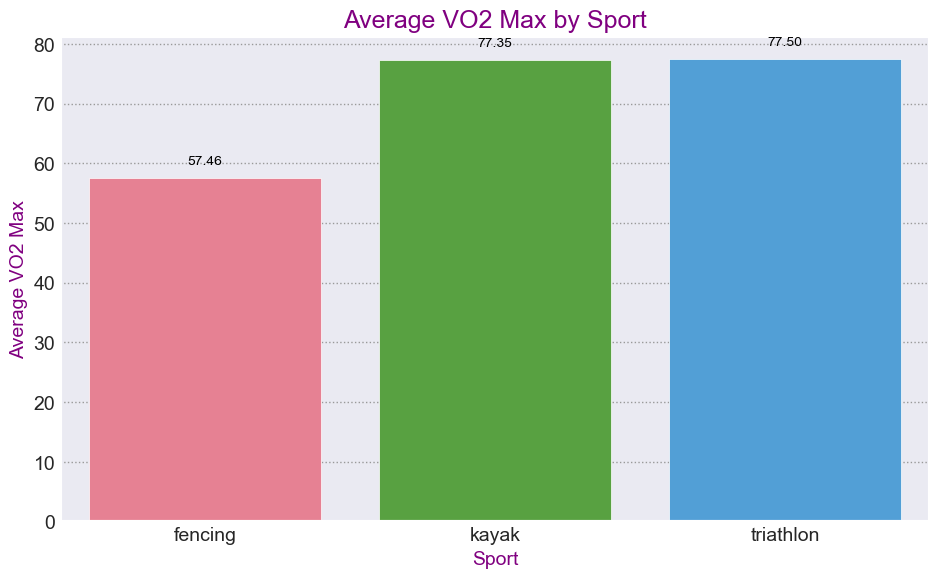

In [623]:

import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')
#Load athlete details into dataframe
df = pd.ExcelFile(r"/Users/niles/V02Max_Combined.xlsx")
ath = pd.read_excel(df, sheet_name = 'Athletes')
maxVO2=pd.DataFrame(ath)
#print(maxVO2)
final_table=pd.concat([fen[['ID','time','RR','VO2','power']],
                       kay[['ID','time','RR','VO2','power']],
                       tri[['ID','time','RR','VO2','power']]],ignore_index=True)
#print(final_table)
#Sum the VO2 values for each ID
total_VO2 = final_table.groupby('ID')['VO2'].sum().reset_index()
#Merge sum of VO2 values for each id to maxVO2 dataframe
maxVO2=pd.merge(maxVO2,total_VO2,on='ID')
#print(maxVO2)
#Find Max VO2 which is VO2 divided by each athlete weight
maxVO2['Max VO2']=maxVO2['VO2']/maxVO2['Weight']
#find the avg vo2 max group by sport
avg_maxvo2=maxVO2.groupby('sport')['Max VO2'].mean().reset_index()
print('VO2 max for each sport:')
print(avg_maxvo2)
# Set the style of the plot
sns.set_style('darkgrid' ,{'grid.color': '.6', 'grid.linestyle': ':'})
#Plot bar chart
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='sport', y='Max VO2', data=avg_maxvo2, palette='husl')
#To show count
for p in ax.patches:
 height = p.get_height()
 # Format height to 2 decimal points
 label = f'{height:.2f}'
 ax.annotate(label, (p.get_x() + p.get_width() / 2., height), ha='center',va='baseline', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')
#Assign titles and lables
plt.title('Average VO2 Max by Sport',fontsize=18, color ='Purple')
plt.xlabel('Sport', fontsize=14, color ='Purple')
plt.ylabel('Average VO2 Max', fontsize=14, color ='Purple')
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.show()

<span style="font-size:24px;">##Question:20 Analyze the trend of HR at the start of the test vs the middle and the end.What is the overall trend?</span> 


DataFrame:
   ID     time     RR       VO2  power
0  11 -168.600  727.0  0.287147      0
1  11 -167.872  728.0  0.287147      0
2  11 -167.148  724.0  0.287147      0
3  11 -166.484  664.0  0.320580      0
4  11 -165.836  648.0  0.320580      0

Trend Data:
    Phase          HR
0   Start   82.530949
1  Middle  164.835165
2     End  113.636364


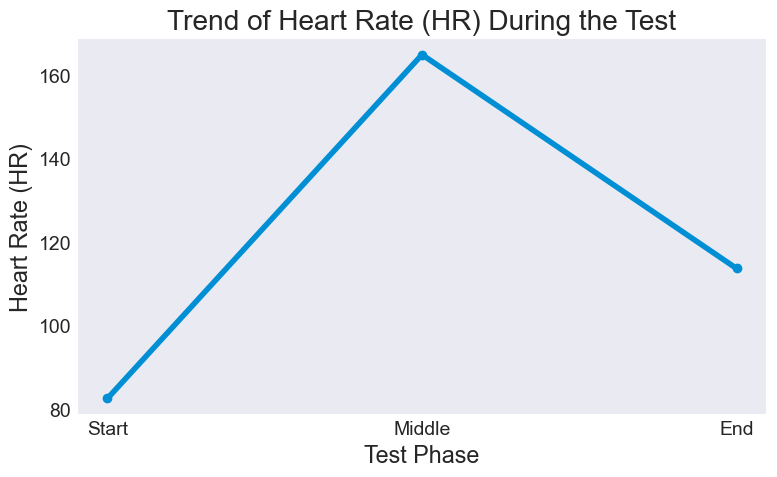


Overall Trend: Variable

Overall Trend: Variable


In [625]:
# Load the data
file_path = r"/Users/niles/V02Max_Combined.xlsx" 
df = pd.read_excel(file_path, sheet_name='Kayaking') 

# Display the first few rows of the DataFrame (optional)
print("DataFrame:")
print(df.head())

#calculating HR
df['HR']=60/(df['RR']/1000)
# Extract HR values at the start, middle, and end
start_hr = df['HR'].iloc[0]  # First entry (start of the test)
middle_hr = df['HR'].iloc[len(df) // 2]  # Middle entry
end_hr = df['HR'].iloc[-1]  # Last entry (end of the test)

# Create a DataFrame for trend analysis
trend_data = pd.DataFrame({
    'Phase': ['Start', 'Middle', 'End'],
    'HR': [start_hr, middle_hr, end_hr]
})

# Display the trend data
print("\nTrend Data:")
print(trend_data)

# Visualize the trend
plt.figure(figsize=(8, 5))
plt.plot(trend_data['Phase'], trend_data['HR'], marker='o')
plt.title('Trend of Heart Rate (HR) During the Test')
plt.xlabel('Test Phase')
plt.ylabel('Heart Rate (HR)')
plt.grid()
plt.tight_layout()
plt.show()

# Analyze the overall trend
if start_hr < middle_hr < end_hr:
    overall_trend = "Increasing"
elif start_hr > middle_hr > end_hr:
    overall_trend = "Decreasing"
else:
    overall_trend = "Variable"

print(f"\nOverall Trend: {overall_trend}")


print(f"\nOverall Trend: {overall_trend}")





<span style="font-size:24px;">##Question21:Display a pie chart of number of athletes by sport.</span>.

DataFrame:
   ID  age  Weight  Height  P_vt1  P_vt2    sport  Gender Ethnicity  \
0   1   15    53.7     161     50    140  fencing  Female   African   
1   2   15    56.2     162     80    127  fencing    Male   African   
2   3   16    89.9     191    155    300  fencing    Male     White   
3   4   16    76.5     180    215    275  fencing    Male     White   
4   5   17    76.4     186    110    172  fencing  Female     White   

  First Name Last Name  
0     Olivia  Martinez  
1      Ethan  Reynolds  
2    Jackson    Harper  
3       Liam   Sanchez  
4        Ava  Thompson  


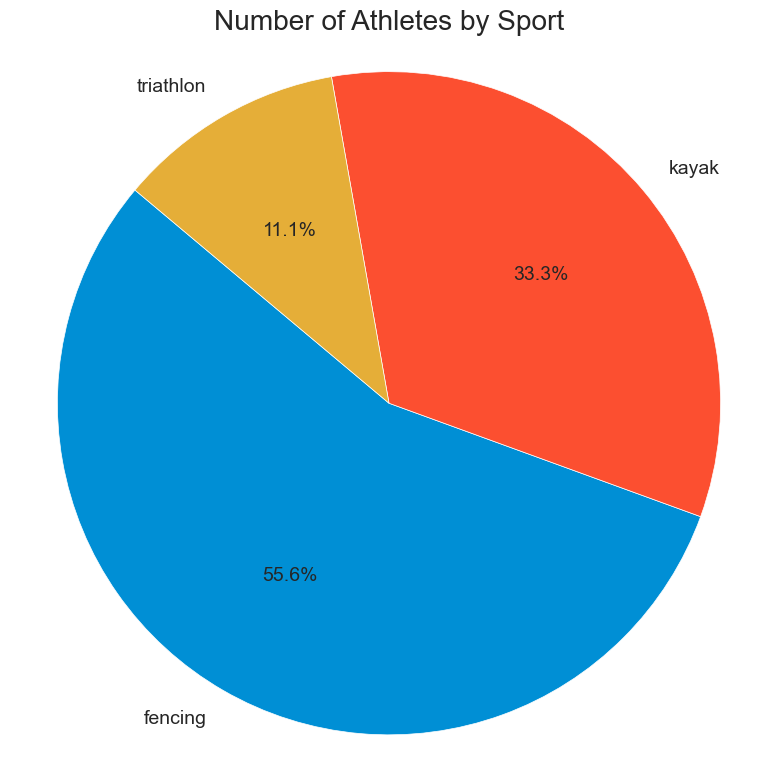

In [627]:
print("DataFrame:")
print(ath.head())

# Count the number of athletes by sport
athlete_counts = ath['sport'].value_counts() 

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(athlete_counts, labels=athlete_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of Athletes by Sport')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.tight_layout()
plt.show()

<span style="font-size:24px;">##Question 22:Using any 10 HR values print even if the value is an even number and odd if its an odd number</span>


In [629]:
# Fetch RR values from Triathlon
tri['HR']=60/(tri['RR']/1000)
hr_values = tri['HR'].sample(n=10, random_state=1).tolist() 

# Print even or odd for each HR value
for hr in hr_values:
    if hr % 2 == 0:
        print(f"{hr} is even")
    else:
        print(f"{hr} is odd")

131.57894736842104 is odd
127.11864406779662 is odd
166.66666666666669 is odd
137.61467889908258 is odd
132.7433628318584 is odd
126.05042016806723 is odd
82.41758241758242 is odd
132.7433628318584 is odd
142.85714285714286 is odd
150.0 is even


<span style="font-size:24px;">##Question 23: Which heart rate zone did most participants spend the longest duration of time in?</span>


In [631]:
# Display the first few rows of the DataFrame (optional)
print("DataFrame:")
print(fen.head())

# Define heart rate zones (example ranges)
def heart_rate_zone(hr):
    if hr < 60:
        return 'Resting'
    elif 60 <= hr < 100:
        return 'Moderate'
    elif 100 <= hr < 140:
        return 'Vigorous'
    else:
        return 'Maximal'
fen['HR']=60/(fen['RR']/1000)
# Apply the function to create a new column for heart rate zone
fen['Zone'] = fen['HR'].apply(heart_rate_zone) 

# Calculate the duration spent in each zone for each participant

zone_duration = fen.groupby('Zone')['time'].sum().reset_index() 

# Identify the zone with the maximum duration
max_zone = zone_duration.loc[zone_duration['time'].idxmax()]

# Display the results
print("\nDuration in Each Heart Rate Zone:")
print(zone_duration)
print(f"\nZone with the longest duration: {max_zone['Zone']} with {max_zone['time']} units of time.")


DataFrame:
   ID     time   RR       VO2  power         HR      Zone
0   1 -130.840  672  0.302008      0  89.285714  Moderate
1   1 -130.168  672  0.302008      0  89.285714  Moderate
2   1 -129.536  632  0.301336      0  94.936709  Moderate
3   1 -128.824  712  0.301336      0  84.269663  Moderate
4   1 -127.948  876  0.301336      0  68.493151  Moderate

Duration in Each Heart Rate Zone:
       Zone          time
0   Maximal  1.070860e+07
1  Moderate -1.736734e+05
2   Resting -1.662085e+04
3  Vigorous  3.659421e+06

Zone with the longest duration: Maximal with 10708599.02 units of time.


<span style="font-size:24px;">##Question 24:Store athlete name and sport in a dictionary as a pair of values.</span>

In [633]:

print("DataFrame:")
print(ath.head())

#concatenate first name and last name for row name
ath['full_nm'] = ath['First Name'] + " " + ath['Last Name']
athlete_sport_dict = {row['full_nm']:row['sport'] for index, row in ath.iterrows()}

# Display the dictionary
print("\nAthlete and Sport Dictionary:")
print(athlete_sport_dict)

DataFrame:
   ID  age  Weight  Height  P_vt1  P_vt2    sport  Gender Ethnicity  \
0   1   15    53.7     161     50    140  fencing  Female   African   
1   2   15    56.2     162     80    127  fencing    Male   African   
2   3   16    89.9     191    155    300  fencing    Male     White   
3   4   16    76.5     180    215    275  fencing    Male     White   
4   5   17    76.4     186    110    172  fencing  Female     White   

  First Name Last Name  
0     Olivia  Martinez  
1      Ethan  Reynolds  
2    Jackson    Harper  
3       Liam   Sanchez  
4        Ava  Thompson  

Athlete and Sport Dictionary:
{'Olivia Martinez': 'fencing', 'Ethan Reynolds': 'fencing', 'Jackson Harper': 'fencing', 'Liam Sanchez': 'fencing', 'Ava Thompson': 'fencing', 'Sophia Rodriguez': 'fencing', 'Grace Simmons': 'fencing', 'Aiden Bennett': 'fencing', 'Chloe Price': 'fencing', 'Lily Jordan': 'fencing', 'Isabella Griffin': 'kayak', 'Caleb Dixon': 'kayak', 'Mia Carpenter': 'kayak', 'Harper Mitchell': '

<span style="font-size:24px;">##Question 25:Using arrays and loops, find the count of athletes based on gender.</span>

In [635]:
#fetch Gender of Athletes
athlete_genders = ath['Gender'].tolist()  # Convert the Gender column to a list

# Initialize a count dictionary
gender_count = {}

# Loop through the array to count genders
for gender in athlete_genders:
    if gender in gender_count:
        gender_count[gender] += 1  # Increment count if gender already exists
    else:
        gender_count[gender] = 1  # Initialize count if gender is encountered for the first time

# Display the counts of athletes based on gender
print("\nCount of Athletes by Gender:")
for gender, count in gender_count.items():
    print(f"{gender}: {count}")


Count of Athletes by Gender:
Female: 10
Male: 8


<span style="font-size:24px;">##Question 26:Create a sankey diagram to show the groups of race within each sport</span>

DataFrame:
   ID  age  Weight  Height  P_vt1  P_vt2    sport  Gender Ethnicity  \
0   1   15    53.7     161     50    140  fencing  Female   African   
1   2   15    56.2     162     80    127  fencing    Male   African   
2   3   16    89.9     191    155    300  fencing    Male     White   
3   4   16    76.5     180    215    275  fencing    Male     White   
4   5   17    76.4     186    110    172  fencing  Female     White   

  First Name Last Name          full_nm  
0     Olivia  Martinez  Olivia Martinez  
1      Ethan  Reynolds   Ethan Reynolds  
2    Jackson    Harper   Jackson Harper  
3       Liam   Sanchez     Liam Sanchez  
4        Ava  Thompson     Ava Thompson  


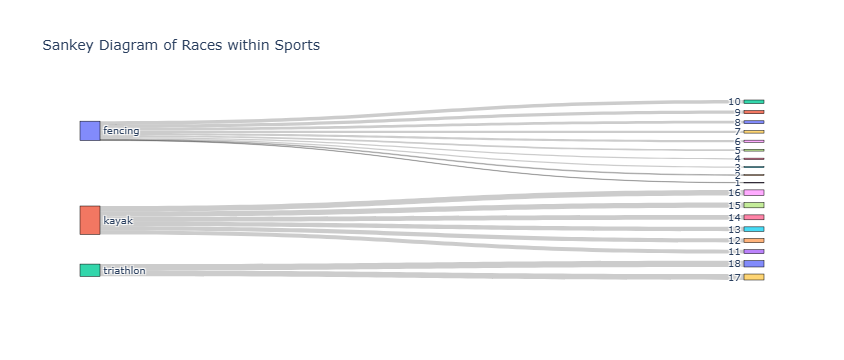

In [637]:
print("DataFrame:")
import plotly.graph_objects as go
print(ath.head())
# Create a count of races within each sport
sankey_data = ath.groupby(['sport', 'ID']).size().reset_index()

# Create a list of unique sports and races
sports = sankey_data['sport'].unique()
races = sankey_data['ID'].unique()

# Create a mapping for the indices of the nodes
sport_indices = {sport: i for i, sport in enumerate(sports)}
race_indices = {race: i + len(sports) for i, race in enumerate(races)}  # Offset by the number of sports

# Create the source and target lists for the Sankey diagram
sources = []
targets = []
values = []

for _, row in sankey_data.iterrows():
    sources.append(sport_indices[row['sport']])
    targets.append(race_indices[row['ID']])
    values.append(row['ID'])

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=list(sports) + list(races),  # Combine sports and races for labels
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
    ))])

fig.update_layout(title_text="Sankey Diagram of Races within Sports", font_size=10)
fig.show()


<span style="font-size:24px;">##Question 27:Calculate the average heart rate for every minute for every athlete and add it as a column in the same dataframe.</span>

In [651]:
# Create a DataFrame
#Concatenating all sport related table to one dataframe final_table
final_table=pd.concat([fen[['ID','time','RR','VO2','power']],
                       kay[['ID','time','RR','VO2','power']],
                       tri[['ID','time','RR','VO2','power']]],ignore_index=True)

#defining output excel file name
output='FinalVO2_Table.xlsx'

#writing dataframe to excel using to_excel
final_table.to_excel(output,index=False)
print("Dataframe successfully written to Excel file",output)

#Reading the excel file back into dataframe for verification
print("\nReading",output,"Excel file for Verification:")
sportdf=pd.read_excel("FinalVO2_Table.xlsx")
df = pd.DataFrame(sportdf)

# Convert the timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['time'])
# Convert RR intervals to heart rate (bpm)
df['heart_rate'] = 60000 / df['RR']
# Add a new column for the minute of each timestamp
df['minute'] = df['timestamp'].dt.floor('T')

# Calculate the average heart rate for each athlete for every minute
average_hr = df.groupby(['ID', 'minute'])['heart_rate'].mean().reset_index()

# Rename the 'heart_rate' column to 'avg_heart_rate'
average_hr.rename(columns={'heart_rate': 'avg_heart_rate'}, inplace=True)

# Merge the average heart rate back into the original DataFrame
df = pd.merge(df, average_hr, on=['ID', 'minute'], how='left')

# Drop the 'minute' column if it's not needed
df = df.drop(columns=['minute'])

# Display the updated DataFrame
print(df)


Dataframe successfully written to Excel file FinalVO2_Table.xlsx

Reading FinalVO2_Table.xlsx Excel file for Verification:
       ID     time     RR       VO2  power                     timestamp  \
0       1 -130.840  672.0  0.302008      0 1969-12-31 23:59:59.999999870   
1       1 -130.168  672.0  0.302008      0 1969-12-31 23:59:59.999999870   
2       1 -129.536  632.0  0.301336      0 1969-12-31 23:59:59.999999871   
3       1 -128.824  712.0  0.301336      0 1969-12-31 23:59:59.999999872   
4       1 -127.948  876.0  0.301336      0 1969-12-31 23:59:59.999999873   
...    ..      ...    ...       ...    ...                           ...   
52057  18  947.288  536.0  0.507071      0 1970-01-01 00:00:00.000000947   
52058  18  947.816  528.0  0.507071      0 1970-01-01 00:00:00.000000947   
52059  18  948.344  528.0  0.507071      0 1970-01-01 00:00:00.000000948   
52060  18  948.884  540.0  0.507071      0 1970-01-01 00:00:00.000000948   
52061  18  949.424  540.0  0.507071      

<span style="font-size:24px;">##Question28: Print athlete 15s Age and Pvt1 using the format() function</span>

In [641]:
# Fetching the Age and Pvt1 for athlete 15
athlete_id = 15

# Extracting the Age and Pvt1 for athlete 15
name = ath.loc[ath['ID'] == athlete_id, 'First Name'].values[0] 
age = ath.loc[ath['ID'] == athlete_id, 'age'].values[0] 
pvt1 = ath.loc[ath['ID'] == athlete_id, 'P_vt1'].values[0] 

# Printing the values using format()
print("Athlete {}:Name={}, Age = {}, Pvt1 = {}".format(athlete_id,name, age, pvt1))


Athlete 15:Name=Mason, Age = 13, Pvt1 = 125


<span style="font-size:24px;">##Question29: On average how long was each participants’ warm up?</span>

In [643]:
#Initialize Dataframe phase
phase=pd.DataFrame(final_table)
print(phase);
#initialize Phase column
phase['Phase']='Other Phase'

#Apply conditions to find Warm Up-time less than 0,GET-time>=0 and power>0,Cool Down-time>0 and power=0
phase.loc[phase['time']<0,'Phase']='Warm Up'
phase.loc[(phase['time']>=0) & (phase['power']>0),'Phase']='GET'
phase.loc[(phase['time']>0) & (phase['power']==0),'Phase']='Cool Down'
# Create a DataFrame
df = pd.DataFrame(phase)
result_df = df.where(df['Phase'] =='Warm Up')
# Calculate the average warm-up time
average_warm_up_time = df['time'].mean()

# Display the result
print(f"On average, each participant's warm-up time was {average_warm_up_time:.2f} minutes.")

       ID     time     RR       VO2  power
0       1 -130.840  672.0  0.302008      0
1       1 -130.168  672.0  0.302008      0
2       1 -129.536  632.0  0.301336      0
3       1 -128.824  712.0  0.301336      0
4       1 -127.948  876.0  0.301336      0
...    ..      ...    ...       ...    ...
52057  18  947.288  536.0  0.507071      0
52058  18  947.816  528.0  0.507071      0
52059  18  948.344  528.0  0.507071      0
52060  18  948.884  540.0  0.507071      0
52061  18  949.424  540.0  0.507071      0

[52062 rows x 5 columns]
On average, each participant's warm-up time was 547.46 minutes.


<span style="font-size:24px;">##Question30:Display the HRV of each athlete?</span>

In [645]:
# Create a DataFrame
df = pd.DataFrame(ath)

# Calculate HRV as the absolute difference between P_vt1 and P_vt2
df['HRV'] = (df['P_vt2'] - df['P_vt1']).abs()

# Display the HRV of each athlete
print("HRV of each athlete:")
print(df[['ID','First Name', 'HRV']])

HRV of each athlete:
    ID First Name  HRV
0    1     Olivia   90
1    2      Ethan   47
2    3    Jackson  145
3    4       Liam   60
4    5        Ava   62
5    6     Sophia   55
6    7      Grace   43
7    8      Aiden   53
8    9      Chloe   75
9   10       Lily   61
10  11   Isabella   94
11  12      Caleb  124
12  13        Mia  123
13  14     Harper   30
14  15      Mason   31
15  16      Logan   96
16  17      Lucas   44
17  18       Owen  103


<span style="font-size:24px;">##Question31:Return the count of athletes for any sport that the user inputs.</span>

In [647]:
# Create a DataFrame
df = pd.DataFrame(ath)

def count_athletes_by_sport(sport):
    # Filter the DataFrame by the specified sport and count the athletes
    count = df[df['sport'] == sport].shape[0]
    return count

# Example usage
user_input_sport = input("Enter the sport: ")  # For instance, the user inputs 'fencing'
athlete_count = count_athletes_by_sport(user_input_sport)

print(f"The number of athletes participating in {user_input_sport} is: {athlete_count}")


Enter the sport:  fencing


The number of athletes participating in fencing is: 10


<span style="font-size:24px;">##Question32:Insert the name of every athlete into an array and display the length of that array.
</span>

In [425]:
import numpy
print("DataFrame:")
print(ath.head())
# creating an empty list
lst = []
#for counting array size
count=0
#concatenate first name and last name for row name
ath['full_nm'] = ath['First Name'] + " " + ath['Last Name']
 
# iterating till the range
#insert in array

for i in range(0, n):
    ele = ath['full_nm']
    # adding the elemen

    lst.append(ele)  
array1=numpy.array(ath['full_nm'])

print("Printing Array:")
print(lst)
print("Length of Array:")
print(len(array1))

DataFrame:
   ID  age  Weight  Height  P_vt1  P_vt2    sport  Gender Ethnicity  \
0   1   15    53.7     161     50    140  fencing  Female   African   
1   2   15    56.2     162     80    127  fencing    Male   African   
2   3   16    89.9     191    155    300  fencing    Male     White   
3   4   16    76.5     180    215    275  fencing    Male     White   
4   5   17    76.4     186    110    172  fencing  Female     White   

  First Name Last Name          full_nm  
0     Olivia  Martinez  Olivia Martinez  
1      Ethan  Reynolds   Ethan Reynolds  
2    Jackson    Harper   Jackson Harper  
3       Liam   Sanchez     Liam Sanchez  
4        Ava  Thompson     Ava Thompson  
Printing Array:
[0      Olivia Martinez
1       Ethan Reynolds
2       Jackson Harper
3         Liam Sanchez
4         Ava Thompson
5     Sophia Rodriguez
6        Grace Simmons
7        Aiden Bennett
8          Chloe Price
9          Lily Jordan
10    Isabella Griffin
11         Caleb Dixon
12       Mia Carp